In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [2]:
cubic_zirconia = pd.read_csv('cubic_zirconia.csv')

In [3]:
cubic_zirconia

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [4]:
cubic_zirconia.shape

(26967, 11)

In [5]:
cubic_zirconia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
cubic_zirconia.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [7]:
cubic_zirconia.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,13484.000000,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [8]:
cubic_zirconia.depth.unique()

array([62.1, 60.8, 62.2, 61.6, 60.4, 61.5, 63.7, 63.8, 60.5, 60.7, 61.1,
       66.2, 61.2, 59.8, 61.9, 60. , 62.9, 62.7, 61.7, 62.4, 61.4,  nan,
       64. , 62.3, 63. , 59.9, 62.8, 61.3, 62. , 61. , 63.9, 62.6, 62.5,
       61.8, 58. , 64.9, 60.9, 59.7, 63.2, 58.4, 59.4, 63.5, 63.1, 66.8,
       65.2, 60.6, 64.3, 60.2, 60.3, 65.5, 58.5, 68.3, 66.5, 63.3, 58.8,
       63.6, 63.4, 57.5, 59. , 58.7, 59.1, 64.1, 64.5, 64.4, 60.1, 57.6,
       70.6, 59.2, 59.3, 50.8, 58.9, 65.4, 58.6, 59.5, 56.7, 67. , 66. ,
       54.6, 59.6, 64.7, 66.9, 64.6, 64.8, 58.2, 57.9, 56.9, 66.4, 65. ,
       66.6, 57.4, 64.2, 58.1, 67.7, 55.2, 66.3, 65.3, 67.9, 67.6, 65.8,
       67.1, 65.1, 67.5, 56.6, 55.9, 57.3, 57.1, 57.8, 58.3, 65.7, 57.2,
       52.7, 56.1, 66.1, 56.3, 66.7, 54.7, 71.3, 67.3, 65.9, 71. , 57.7,
       53.4, 65.6, 56. , 68.9, 68.8, 55.3, 69.2, 53.1, 69.8, 56.5, 56.2,
       55.1, 55.5, 53.2, 56.8, 68.4, 67.8, 55.6, 67.2, 57. , 69. , 55.8,
       52.2, 53.8, 68.6, 68. , 68.7, 68.5, 70.2, 56

In [9]:
cubic_zirconia[cubic_zirconia['depth'].isnull()]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26,27,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,87,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,118,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,149,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,164,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...,...
26848,26849,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,26855,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,26880,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,26924,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


In [8]:
cubic_zirconia['depth'] = np.where(cubic_zirconia.depth.isnull(),round(cubic_zirconia.depth.mean(),1),cubic_zirconia.depth)

In [141]:
cubic_zirconia.iloc[[26,86,117,148,163]]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26,27,0.34,Ideal,D,SI1,61.7,57.0,4.50,4.44,2.74,803
86,87,0.74,Ideal,E,SI2,61.7,59.0,5.92,5.97,3.52,2501
117,118,1.00,Premium,F,SI1,61.7,59.0,6.40,6.36,4.00,5292
148,149,1.11,Premium,E,SI2,61.7,61.0,6.66,6.61,4.09,4177
163,164,1.00,Very Good,F,VS2,61.7,55.0,6.39,6.44,3.99,6340


In [120]:
cubic_zirconia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26967 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [121]:
cubic_zirconia.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [34]:
cubic_zirconia['depth'].unique()

array([62.1, 60.8, 62.2, 61.6, 60.4, 61.5, 63.7, 63.8, 60.5, 60.7, 61.1,
       66.2, 61.2, 59.8, 61.9, 60. , 62.9, 62.7, 61.7, 62.4, 61.4, 64. ,
       62.3, 63. , 59.9, 62.8, 61.3, 62. , 61. , 63.9, 62.6, 62.5, 61.8,
       58. , 64.9, 60.9, 59.7, 63.2, 58.4, 59.4, 63.5, 63.1, 66.8, 65.2,
       60.6, 64.3, 60.2, 60.3, 65.5, 58.5, 68.3, 66.5, 63.3, 58.8, 63.6,
       63.4, 57.5, 59. , 58.7, 59.1, 64.1, 64.5, 64.4, 60.1, 57.6, 70.6,
       59.2, 59.3, 50.8, 58.9, 65.4, 58.6, 59.5, 56.7, 67. , 66. , 54.6,
       59.6, 64.7, 66.9, 64.6, 64.8, 58.2, 57.9, 56.9, 66.4, 65. , 66.6,
       57.4, 64.2, 58.1, 67.7, 55.2, 66.3, 65.3, 67.9, 67.6, 65.8, 67.1,
       65.1, 67.5, 56.6, 55.9, 57.3, 57.1, 57.8, 58.3, 65.7, 57.2, 52.7,
       56.1, 66.1, 56.3, 66.7, 54.7, 71.3, 67.3, 65.9, 71. , 57.7, 53.4,
       65.6, 56. , 68.9, 68.8, 55.3, 69.2, 53.1, 69.8, 56.5, 56.2, 55.1,
       55.5, 53.2, 56.8, 68.4, 67.8, 55.6, 67.2, 57. , 69. , 55.8, 52.2,
       53.8, 68.6, 68. , 68.7, 68.5, 70.2, 56.4, 68

In [35]:
cubic_zirconia.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [36]:
cubic_zirconia.duplicated().sum()

0

In [37]:
cubic_zirconia[cubic_zirconia['x'] == 0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
5821,5822,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,6216,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,17507,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


C:\Users\zaid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zaid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zaid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

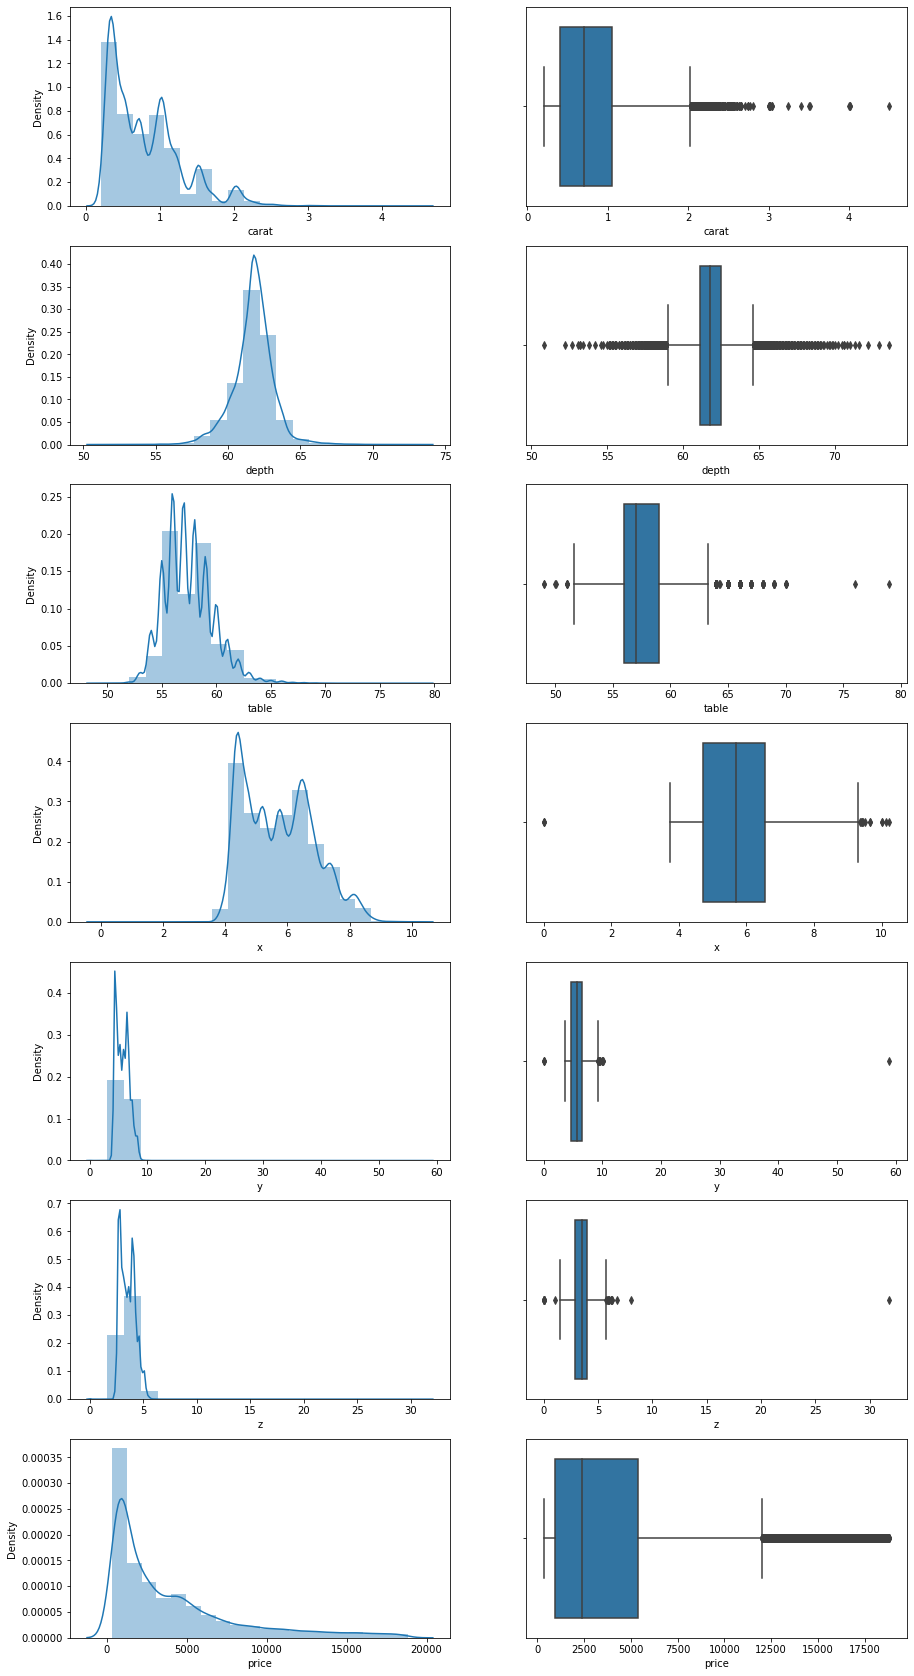

In [9]:
plt.figure(figsize=(15,30))
plt.subplot(7,2,1)
sns.distplot(cubic_zirconia.carat,bins = 20)
plt.subplot(7,2,2)
sns.boxplot(x = 'carat',data = cubic_zirconia)
plt.subplot(7,2,3)
sns.distplot(cubic_zirconia.depth,bins = 20)
plt.subplot(7,2,4)
sns.boxplot(x = 'depth',data = cubic_zirconia)
plt.subplot(7,2,5)
sns.distplot(cubic_zirconia.table,bins = 20)
plt.subplot(7,2,6)
sns.boxplot(x = 'table',data = cubic_zirconia)
plt.subplot(7,2,7)
sns.distplot(cubic_zirconia.x,bins = 20)
plt.subplot(7,2,8)
sns.boxplot(x = 'x',data = cubic_zirconia)
plt.subplot(7,2,9)
sns.distplot(cubic_zirconia.y,bins = 20)
plt.subplot(7,2,10)
sns.boxplot(x = 'y',data = cubic_zirconia)
plt.subplot(7,2,11)
sns.distplot(cubic_zirconia.z,bins = 20)
plt.subplot(7,2,12)
sns.boxplot(x = 'z',data = cubic_zirconia)
plt.subplot(7,2,13)
sns.distplot(cubic_zirconia.price,bins = 20)
plt.subplot(7,2,14)
sns.boxplot(x = 'price',data = cubic_zirconia)
plt.show()

<AxesSubplot:>

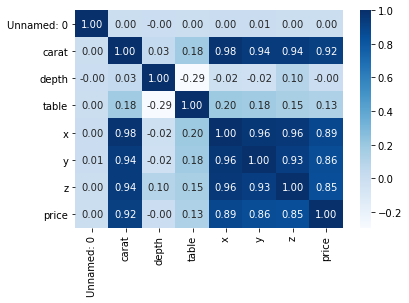

In [19]:
sns.heatmap(cubic_zirconia.corr(),cmap='Blues',annot=True,fmt='0.2f')

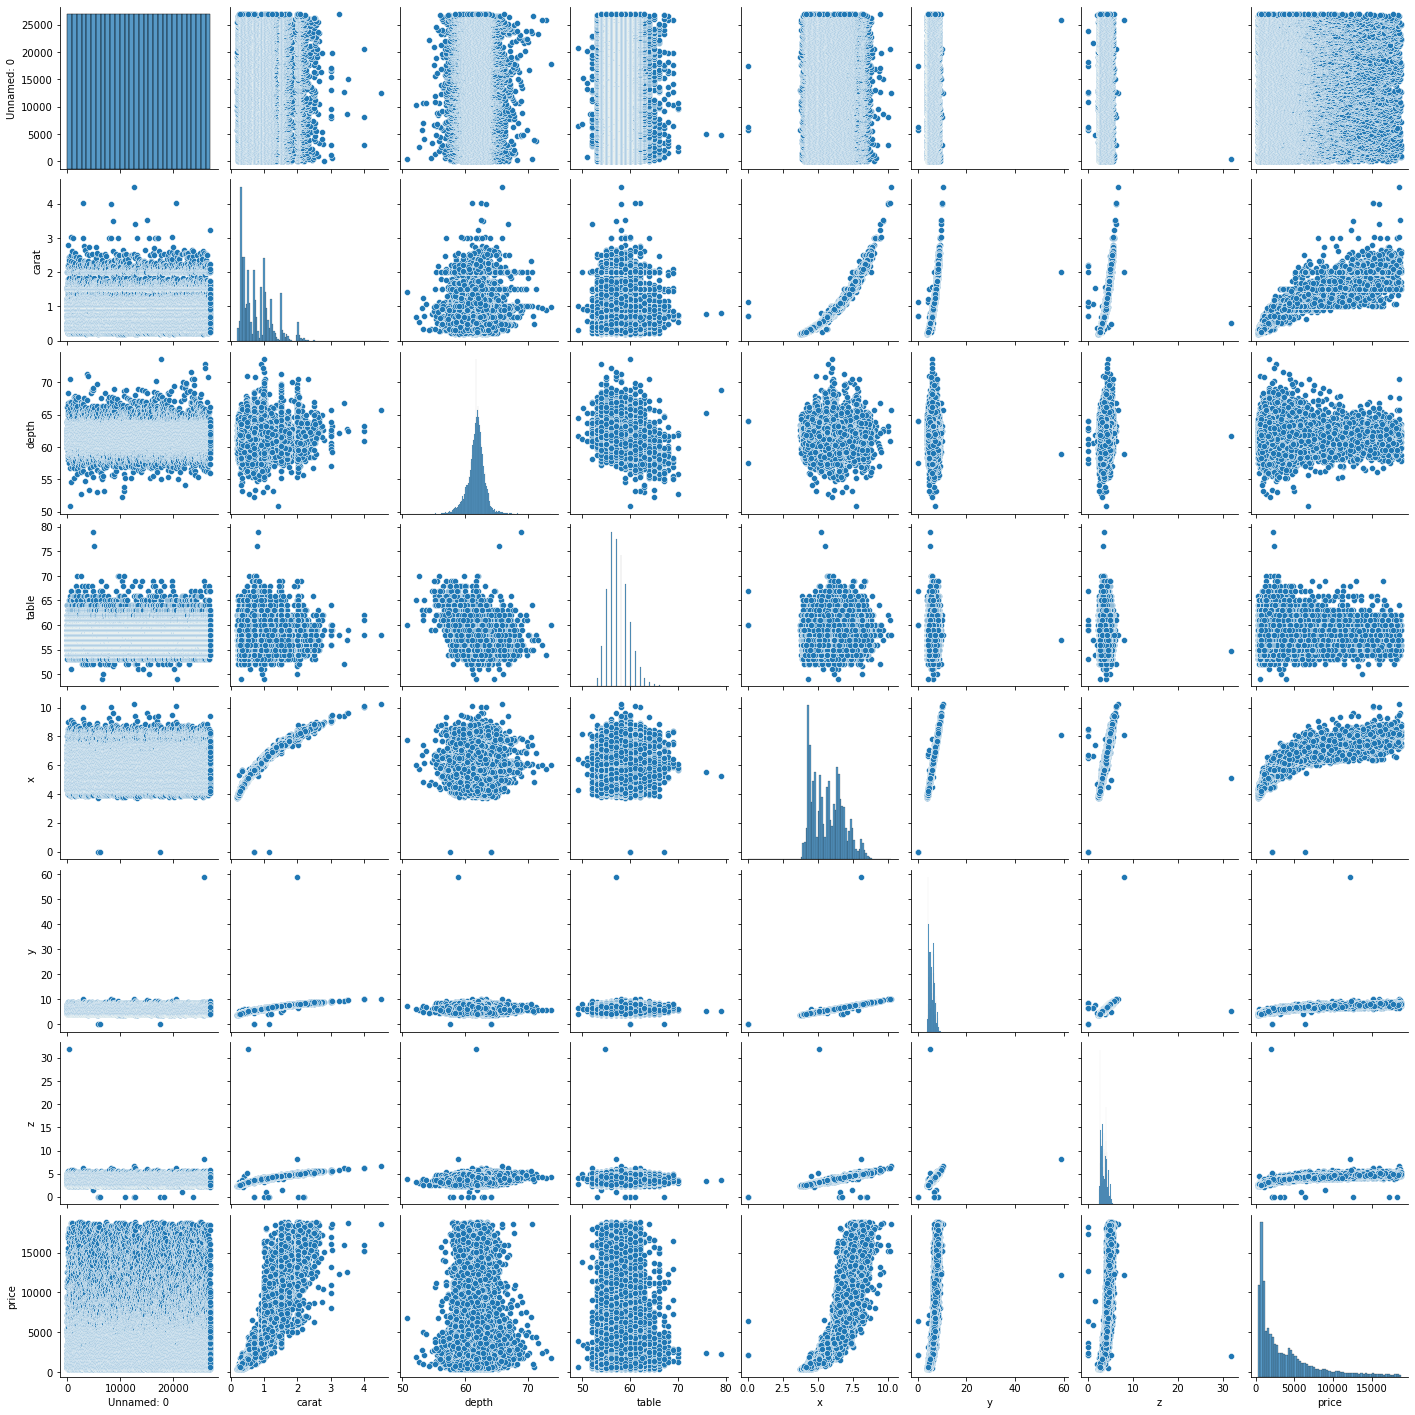

In [20]:
sns.pairplot(cubic_zirconia)

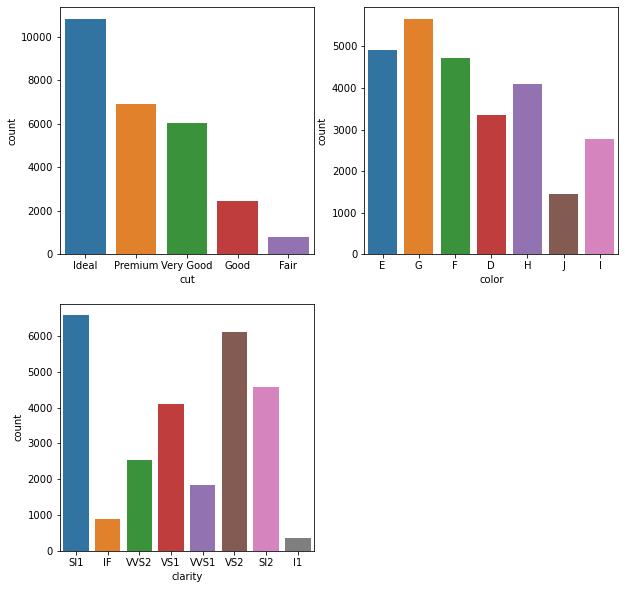

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x = 'cut',data = cubic_zirconia)
plt.subplot(2,2,2)
sns.countplot(x = 'color', data = cubic_zirconia)
plt.subplot(2,2,3)
sns.countplot(x = 'clarity',data = cubic_zirconia)
plt.show()

In [10]:
cubic_zirconia.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [11]:
len(cubic_zirconia.columns)

10

In [12]:
cubic_zirconia.columns[0]

'carat'

<AxesSubplot:ylabel='price'>

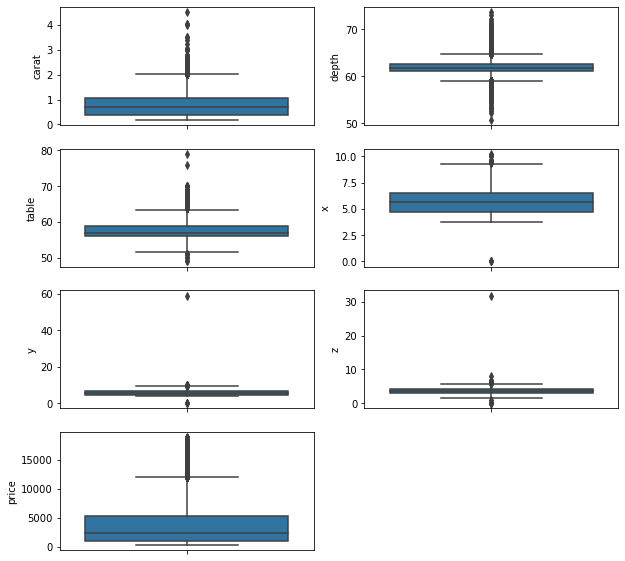

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(4,2,1)
sns.boxplot(y = 'carat',data= cubic_zirconia)
plt.subplot(4,2,2)
sns.boxplot(y = 'depth',data= cubic_zirconia)
plt.subplot(4,2,3)
sns.boxplot(y = 'table',data= cubic_zirconia)
plt.subplot(4,2,4)
sns.boxplot(y = 'x',data= cubic_zirconia)
plt.subplot(4,2,5)
sns.boxplot(y = 'y',data= cubic_zirconia)
plt.subplot(4,2,6)
sns.boxplot(y = 'z',data= cubic_zirconia)
plt.subplot(4,2,7)
sns.boxplot(y = 'price',data= cubic_zirconia)

In [28]:
q1 = cubic_zirconia.quantile(0.25)
q3 = cubic_zirconia.quantile(0.75)
iqr = q3 - q1
pd.DataFrame((((cubic_zirconia < (q1 - 1.5*iqr)) | (cubic_zirconia > (q3 + 1.5*iqr))).sum()/cubic_zirconia.shape[0]*100),columns=['outliers%'],index = None).round(2)

,outliers%
carat,2.45
clarity,0.00
color,0.00
cut,0.00
depth,5.26
price,6.60
table,1.18
x,0.06
y,0.06
z,0.09


In [29]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 -(1.5*IQR)
    upper_range = Q3 +(1.5*IQR)
    return lower_range, upper_range

In [79]:
for column in cubic_zirconia.columns:
    if cubic_zirconia[column].dtype != 'object':
        lr, ur = remove_outliers(cubic_zirconia[column])
        print(cubic_zirconia[cubic_zirconia[column]>ur] + cubic_zirconia[cubic_zirconia[column]<lr])

       carat  cut color clarity  depth  table   x   y   z  price
79       NaN  NaN   NaN     NaN    NaN    NaN NaN NaN NaN    NaN
124      NaN  NaN   NaN     NaN    NaN    NaN NaN NaN NaN    NaN
135      NaN  NaN   NaN     NaN    NaN    NaN NaN NaN NaN    NaN
263      NaN  NaN   NaN     NaN    NaN    NaN NaN NaN NaN    NaN
281      NaN  NaN   NaN     NaN    NaN    NaN NaN NaN NaN    NaN
...      ...  ...   ...     ...    ...    ...  ..  ..  ..    ...
26680    NaN  NaN   NaN     NaN    NaN    NaN NaN NaN NaN    NaN
26845    NaN  NaN   NaN     NaN    NaN    NaN NaN NaN NaN    NaN
26869    NaN  NaN   NaN     NaN    NaN    NaN NaN NaN NaN    NaN
26924    NaN  NaN   NaN     NaN    NaN    NaN NaN NaN NaN    NaN
26957    NaN  NaN   NaN     NaN    NaN    NaN NaN NaN NaN    NaN

[662 rows x 10 columns]
       carat  cut color clarity  depth  table   x   y   z  price
14       NaN  NaN   NaN     NaN    NaN    NaN NaN NaN NaN    NaN
50       NaN  NaN   NaN     NaN    NaN    NaN NaN NaN NaN    NaN


In [30]:
for column in cubic_zirconia.columns:
    if cubic_zirconia[column].dtype != 'object':
        lr,ur = remove_outliers(cubic_zirconia[column])
        cubic_zirconia[column] = np.where(cubic_zirconia[column]<lr,lr,cubic_zirconia[column])
        cubic_zirconia[column] = np.where(cubic_zirconia[column]> ur, ur,cubic_zirconia[column])

<AxesSubplot:ylabel='price'>

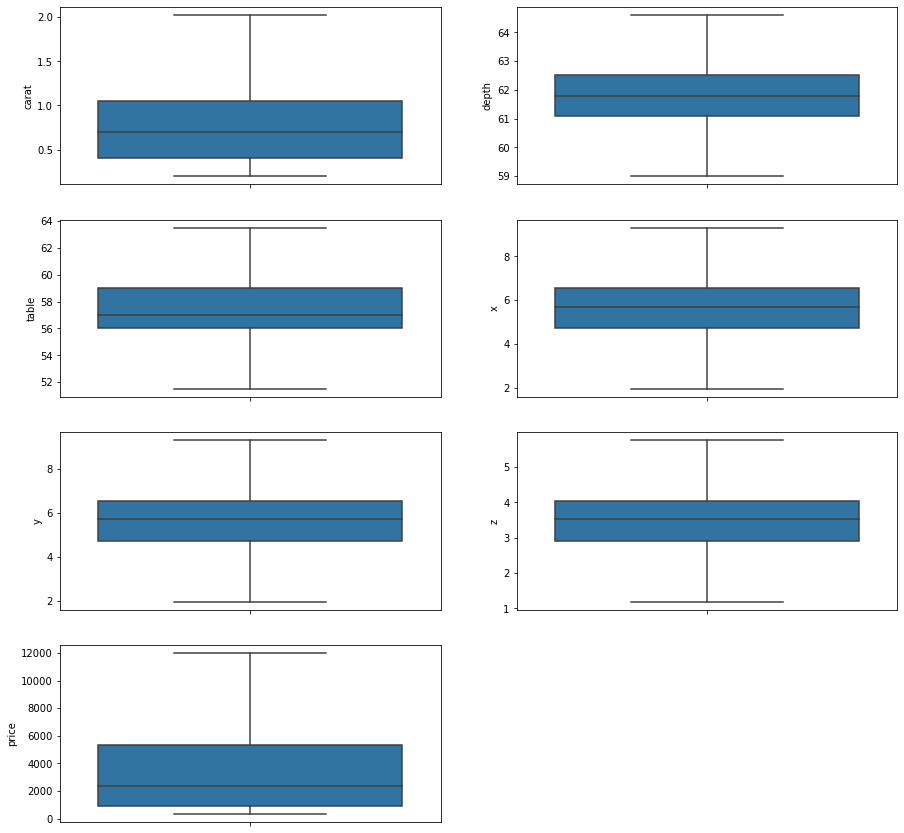

In [31]:
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.boxplot(y = 'carat',data= cubic_zirconia)
plt.subplot(4,2,2)
sns.boxplot(y = 'depth',data= cubic_zirconia)
plt.subplot(4,2,3)
sns.boxplot(y = 'table',data= cubic_zirconia)
plt.subplot(4,2,4)
sns.boxplot(y = 'x',data= cubic_zirconia)
plt.subplot(4,2,5)
sns.boxplot(y = 'y',data= cubic_zirconia)
plt.subplot(4,2,6)
sns.boxplot(y = 'z',data= cubic_zirconia)
plt.subplot(4,2,7)
sns.boxplot(y = 'price',data= cubic_zirconia)

In [130]:
cubic_zirconia.iloc[[5821,6215,17506]]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,1.95,1.965,1.19,2130.0
6215,0.71,Good,F,SI2,64.1,60.0,1.95,1.965,1.19,2130.0
17506,1.14,Fair,G,VS1,59.0,63.5,1.95,1.965,1.19,6381.0


In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
X = StandardScaler()

In [157]:
cubic_num_data = cubic_zirconia.select_dtypes(exclude=['object'])
cubic_zirconia[cubic_num_data.columns] =X.fit_transform(cubic_num_data)

In [158]:
cubic_zirconia.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.067407,Ideal,E,SI1,0.288851,0.261603,-1.295386,-1.288528,-1.258146,-0.933183
1,-1.002532,Premium,G,IF,-0.777680,0.261603,-1.162290,-1.136600,-1.200779,-0.793447
2,0.230108,Very Good,E,VVS2,0.370892,1.188780,0.275152,0.346935,0.348130,0.735009
3,-0.807904,Ideal,F,VS1,-0.121353,-0.665574,-0.807366,-0.832743,-0.827893,-0.765211
4,-1.045782,Ideal,F,VVS1,-1.105843,0.725192,-1.224402,-1.163411,-1.272487,-0.852511


In [161]:
cubic_zirconia['cut'] = np.where(cubic_zirconia['cut'] == 'Fair',0,cubic_zirconia['cut'])
cubic_zirconia['cut'] = np.where(cubic_zirconia['cut'] == 'Good',1,cubic_zirconia['cut'])
cubic_zirconia['cut'] = np.where(cubic_zirconia['cut'] == 'Very Good',2,cubic_zirconia['cut'])
cubic_zirconia['cut'] = np.where(cubic_zirconia['cut'] == 'Premium',3,cubic_zirconia['cut'])
cubic_zirconia['cut'] = np.where(cubic_zirconia['cut'] == 'Ideal',4,cubic_zirconia['cut'])

cubic_zirconia['color'] = np.where(cubic_zirconia['color'] == 'D',0,cubic_zirconia['color'])
cubic_zirconia['color'] = np.where(cubic_zirconia['color'] == 'E',1,cubic_zirconia['color'])
cubic_zirconia['color'] = np.where(cubic_zirconia['color'] == 'F',2,cubic_zirconia['color'])
cubic_zirconia['color'] = np.where(cubic_zirconia['color'] == 'G',3,cubic_zirconia['color'])
cubic_zirconia['color'] = np.where(cubic_zirconia['color'] == 'H',4,cubic_zirconia['color'])
cubic_zirconia['color'] = np.where(cubic_zirconia['color'] == 'I',5,cubic_zirconia['color'])
cubic_zirconia['color'] = np.where(cubic_zirconia['color'] == 'J',6,cubic_zirconia['color'])

cubic_zirconia['clarity'] = np.where(cubic_zirconia['clarity'] == 'IF',0,cubic_zirconia['clarity'])
cubic_zirconia['clarity'] = np.where(cubic_zirconia['clarity'] == 'VVS1',1,cubic_zirconia['clarity'])
cubic_zirconia['clarity'] = np.where(cubic_zirconia['clarity'] == 'VVS2',2,cubic_zirconia['clarity'])
cubic_zirconia['clarity'] = np.where(cubic_zirconia['clarity'] == 'VS1',3,cubic_zirconia['clarity'])
cubic_zirconia['clarity'] = np.where(cubic_zirconia['clarity'] == 'VS2',4,cubic_zirconia['clarity'])
cubic_zirconia['clarity'] = np.where(cubic_zirconia['clarity'] == 'SI1',5,cubic_zirconia['clarity'])
cubic_zirconia['clarity'] = np.where(cubic_zirconia['clarity'] == 'SI2',6,cubic_zirconia['clarity'])
cubic_zirconia['clarity'] = np.where(cubic_zirconia['clarity'] == 'I1',7,cubic_zirconia['clarity'])



In [208]:
cubic_zirconia.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.067407,4,1,5,0.288851,0.261603,-1.295386,-1.288528,-1.258146,-0.933183
1,-1.002532,3,3,0,-0.777680,0.261603,-1.162290,-1.136600,-1.200779,-0.793447
2,0.230108,2,1,2,0.370892,1.188780,0.275152,0.346935,0.348130,0.735009
3,-0.807904,4,2,3,-0.121353,-0.665574,-0.807366,-0.832743,-0.827893,-0.765211
4,-1.045782,4,2,1,-1.105843,0.725192,-1.224402,-1.163411,-1.272487,-0.852511


In [209]:
cubic_zirconia1 = pd.get_dummies(cubic_zirconia,drop_first=True)

In [195]:
cubic_zirconia1

,carat,depth,table,x,y,z,price,cut_1,cut_2,cut_3,...,color_4,color_5,color_6,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7
0,-1.067407,0.288851,0.261603,-1.295386,-1.288528,-1.258146,-0.933183,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-1.002532,-0.777680,0.261603,-1.162290,-1.136600,-1.200779,-0.793447,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.230108,0.370892,1.188780,0.275152,0.346935,0.348130,0.735009,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.807904,-0.121353,-0.665574,-0.807366,-0.832743,-0.827893,-0.765211,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-1.045782,-1.105843,0.725192,-1.224402,-1.163411,-1.272487,-0.852511,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,0.684239,0.452933,0.261603,0.780919,0.704413,0.792724,0.481179,0,0,1,...,0,0,0,0,0,0,0,1,0,0
26963,-1.002532,0.124770,-1.129162,-1.144544,-1.172348,-1.143412,-0.755992,0,0,0,...,1,0,0,0,0,0,0,0,0,0
26964,-0.613277,-0.039312,0.261603,-0.541173,-0.519950,-0.526717,-0.599833,0,0,1,...,0,0,0,0,0,0,1,0,0,0
26965,-1.132283,0.042729,-0.665574,-1.366371,-1.368961,-1.344196,-0.880458,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [211]:
X = cubic_zirconia1.drop(columns='price',axis=1)
y = cubic_zirconia1[['price']]

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .30,random_state = 1)

In [213]:
X_train.shape

(18876, 23)

In [214]:
y_train.shape

(18876, 1)

In [215]:
X_test.shape

(8091, 23)

In [216]:
y_test.shape

(8091, 1)

In [217]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [219]:
for idx, col_name in enumerate(X_train.columns):
    print('the coefficient of {} is {}'.format(col_name,regression_model.coef_[0][idx]))

the coefficient of carat is 1.219840104421633
the coefficient of depth is -0.005959591827335875
the coefficient of table is -0.014071598528856052
the coefficient of x is -0.4270213702679114
the coefficient of y is 0.2935180900578898
the coefficient of z is -0.02179800525689941
the coefficient of cut_1 is 0.10903833456096067
the coefficient of cut_2 is 0.14532724674818837
the coefficient of cut_3 is 0.17462008019535863
the coefficient of cut_4 is 0.18114077380663807
the coefficient of color_1 is -0.05615037825674192
the coefficient of color_2 is -0.0779449796025534
the coefficient of color_3 is -0.12156499215469985
the coefficient of color_4 is -0.24319837169212216
the coefficient of color_5 is -0.3816598850345283
the coefficient of color_6 is -0.5519346720844236
the coefficient of clarity_1 is -0.05708402647817809
the coefficient of clarity_2 is -0.06658298151946244
the coefficient of clarity_3 is -0.18273945122610658
the coefficient of clarity_4 is -0.2609799299990168
the coefficient 

In [221]:
intercept1 = regression_model.intercept_[0]
print('the intercept for our model is {}'.format(intercept1))

the intercept for our model is 0.32174915192443515


In [222]:
regression_model.score(X_train,y_train)

0.9408511924796128

In [223]:
regression_model.score(X_test,y_test)

0.940351933469896

In [226]:
predicted_train1 = regression_model.fit(X_train,y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train1))

0.24373304280844985

In [227]:
predicted_test1 = regression_model.fit(X_train,y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test1))

0.24298728009058698

In [228]:
data_train1 = pd.concat([X_train,y_train],axis=1)
data_test1 = pd.concat([X_test,y_test],axis=1)
data_train1.head()

,carat,depth,table,x,y,z,cut_1,cut_2,cut_3,cut_4,...,color_5,color_6,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7,price
11687,-0.829530,0.452933,-0.665574,-0.851731,-0.895302,-0.827893,0,0,0,1,...,1,0,0,1,0,0,0,0,0,-0.771262
9728,1.981754,0.863137,-0.201985,1.641610,1.624919,1.739279,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0.743940
1936,-1.002532,0.042729,2.115957,-1.180036,-1.145537,-1.143412,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.922523
26220,-0.202397,0.863137,-0.201985,-0.106391,-0.064165,0.003928,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-0.439064
18445,-0.202397,0.288851,-0.665574,-0.053152,-0.019480,-0.010414,0,0,0,1,...,0,0,0,0,0,0,0,1,0,-0.335054


In [37]:
data_train1.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_1', 'cut_2', 'cut_3',
       'cut_4', 'color_1', 'color_2', 'color_3', 'color_4', 'color_5',
       'color_6', 'clarity_1', 'clarity_2', 'clarity_3', 'clarity_4',
       'clarity_5', 'clarity_6', 'clarity_7', 'price'],
      dtype='object')

In [229]:
expr = 'price ~ carat + depth + table + x + y + z + cut_1 + cut_2 + cut_3 + cut_4 + color_1 + color_2 + color_3 + color_4 + color_5 + color_6 + clarity_1 + clarity_2 + clarity_3 + clarity_4 + clarity_5 + clarity_6 + clarity_7 '

In [230]:
import statsmodels.formula.api as smf 
lm = smf.ols(formula=expr,data=data_train1).fit()
lm.params

Intercept    0.321749
carat        1.219840
depth       -0.005960
table       -0.014072
x           -0.427021
y            0.293518
z           -0.021798
cut_1        0.109038
cut_2        0.145327
cut_3        0.174620
cut_4        0.181141
color_1     -0.056150
color_2     -0.077945
color_3     -0.121565
color_4     -0.243198
color_5     -0.381660
color_6     -0.551935
clarity_1   -0.057084
clarity_2   -0.066583
clarity_3   -0.182739
clarity_4   -0.260980
clarity_5   -0.416601
clarity_6   -0.651326
clarity_7   -1.168860
dtype: float64

In [231]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.304e+04
Date:                Sat, 30 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:49:36   Log-Likelihood:                -136.98
No. Observations:               18876   AIC:                             322.0
Df Residuals:                   18852   BIC:                             510.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3217      0.016     20.293      0.0

In [51]:
y_predict = lm.predict(data_test1)

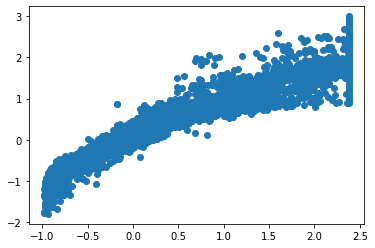

In [232]:
plt.scatter(data_test1['price'],predicted_test1)

In [233]:
for i,j in np.array(lm.params.reset_index()):
    print('({})*{} +'.format(round(j,2),i),end=' ')

(0.32)*Intercept + (1.22)*carat + (-0.01)*depth + (-0.01)*table + (-0.43)*x + (0.29)*y + (-0.02)*z + (0.11)*cut_1 + (0.15)*cut_2 + (0.17)*cut_3 + (0.18)*cut_4 + (-0.06)*color_1 + (-0.08)*color_2 + (-0.12)*color_3 + (-0.24)*color_4 + (-0.38)*color_5 + (-0.55)*color_6 + (-0.06)*clarity_1 + (-0.07)*clarity_2 + (-0.18)*clarity_3 + (-0.26)*clarity_4 + (-0.42)*clarity_5 + (-0.65)*clarity_6 + (-1.17)*clarity_7 + 

In [82]:
import statsmodels.formula.api as smf

In [234]:
expr1 = 'price ~ carat + depth + table + x + y  + cut_1 + cut_2 + cut_3 + cut_4 + color_1 + color_2 + color_3 + color_4 + color_5 + color_6 + clarity_1 + clarity_2 + clarity_3 + clarity_4 + clarity_5 + clarity_6 + clarity_7'

In [235]:
lm1 = smf.ols(formula=expr1,data=data_train1).fit()

In [236]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.363e+04
Date:                Sat, 30 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:12:33   Log-Likelihood:                -137.86
No. Observations:               18876   AIC:                             321.7
Df Residuals:                   18853   BIC:                             502.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3206      0.016     20.251      0.0

In [237]:
mse = np.mean((lm1.predict(data_train1.drop('price',axis=1)) - data_train1['price'])**2)

In [238]:
mse

0.05941133118176837

In [239]:
rmse = np.sqrt(mse)

In [240]:
rmse

0.24374439723154329

In [241]:
mse = np.mean((lm1.predict(data_test1.drop('price',axis=1)) - data_test1['price'])**2)

In [242]:
mse

0.05907395011862874

In [243]:
rmse = np.sqrt(mse)

In [244]:
rmse

0.24305133227083686

In [245]:
for i,j in np.array(lm1.params.reset_index()):
    print('({})*{} +'.format(round(j,2),i),end=' ')

(0.32)*Intercept + (1.22)*carat + (-0.01)*depth + (-0.01)*table + (-0.43)*x + (0.28)*y + (0.11)*cut_1 + (0.15)*cut_2 + (0.18)*cut_3 + (0.18)*cut_4 + (-0.06)*color_1 + (-0.08)*color_2 + (-0.12)*color_3 + (-0.24)*color_4 + (-0.38)*color_5 + (-0.55)*color_6 + (-0.06)*clarity_1 + (-0.07)*clarity_2 + (-0.18)*clarity_3 + (-0.26)*clarity_4 + (-0.42)*clarity_5 + (-0.65)*clarity_6 + (-1.17)*clarity_7 + 

In [246]:
ytest_predict = lm2.predict(data_test1)

In [247]:
ytest_predict

18031    20149.298053
26051    12407.864791
16279    -6037.503390
16466    -8653.146371
19837     7579.804615
             ...     
9716     -9479.253923
9944     -1778.129049
9858     -3131.091240
4075     10194.522915
17732    -8350.422814
Length: 8091, dtype: float64

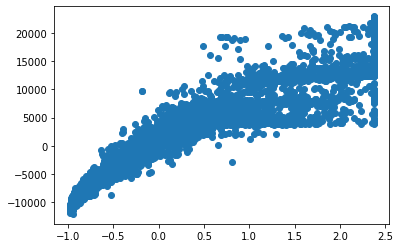

In [248]:
plt.scatter(data_test1['price'],ytest_predict)

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
holiday_package = pd.read_csv('Holiday_Package.csv')

In [5]:
holiday_package

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...,...
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes


In [6]:
holiday_package.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [7]:
holiday_package

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes


In [8]:
holiday_package.shape

(872, 7)

In [9]:
holiday_package.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [10]:
holiday_package.duplicated().sum()

0

In [11]:
holiday_package.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


C:\Users\zaid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zaid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zaid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='no_older_children', ylabel='Density'>

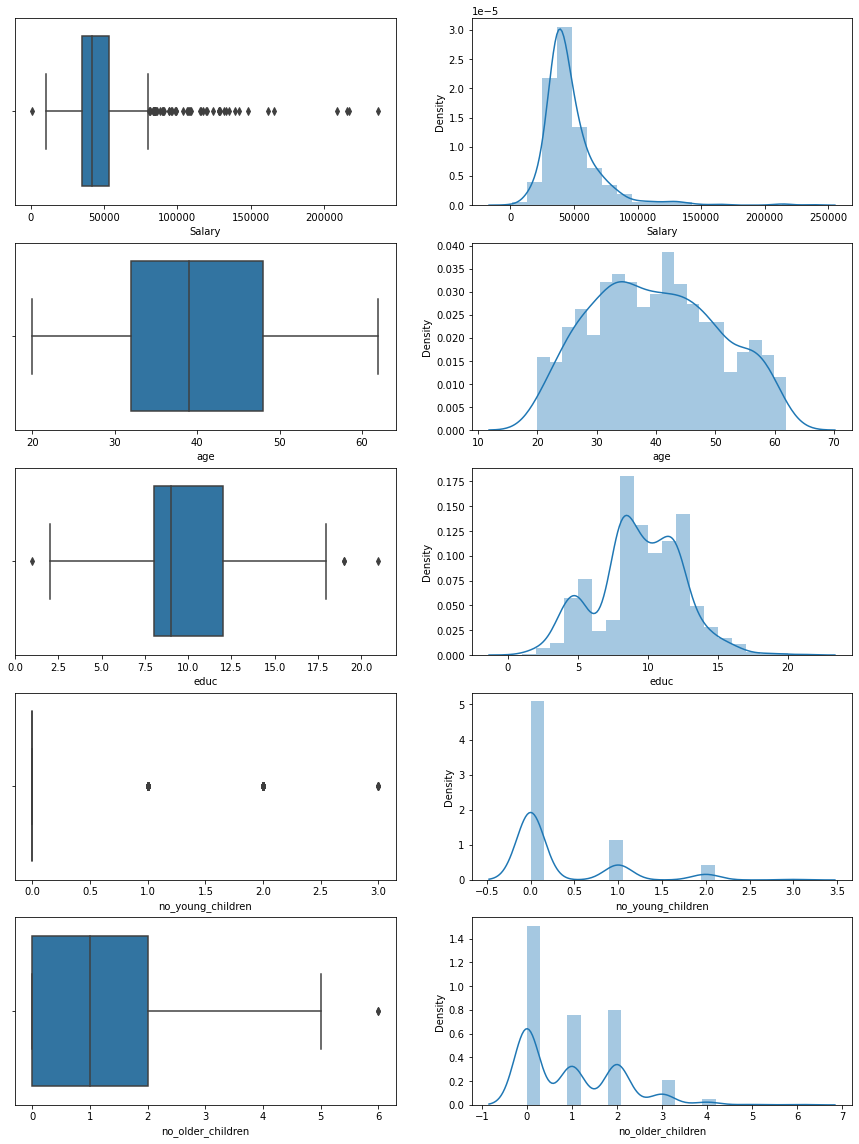

In [12]:
plt.figure(figsize=(15,20))
plt.subplot(5,2,1)
sns.boxplot(x = 'Salary',data = holiday_package)
plt.subplot(5,2,2)
sns.distplot(holiday_package.Salary, bins=20)
plt.subplot(5,2,3)
sns.boxplot(x = 'age',data = holiday_package)
plt.subplot(5,2,4)
sns.distplot(holiday_package.age, bins=20)
plt.subplot(5,2,5)
sns.boxplot(x = 'educ',data = holiday_package)
plt.subplot(5,2,6)
sns.distplot(holiday_package.educ, bins=20)
plt.subplot(5,2,7)
sns.boxplot(x = 'no_young_children',data = holiday_package)
plt.subplot(5,2,8)
sns.distplot(holiday_package.no_young_children, bins=20)
plt.subplot(5,2,9)
sns.boxplot(x = 'no_older_children',data = holiday_package)
plt.subplot(5,2,10)
sns.distplot(holiday_package.no_older_children, bins=20)


<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

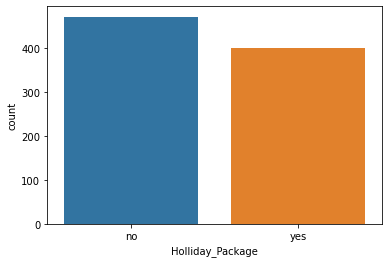

In [112]:
sns.countplot(x = 'Holliday_Package',data = holiday_package)

In [13]:
holiday_package['Holliday_Package'].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [113]:
holiday_package['Holliday_Package'].value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

<AxesSubplot:xlabel='foreign', ylabel='count'>

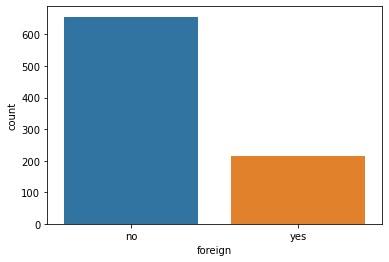

In [114]:
sns.countplot(x = 'foreign',data = holiday_package,)

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

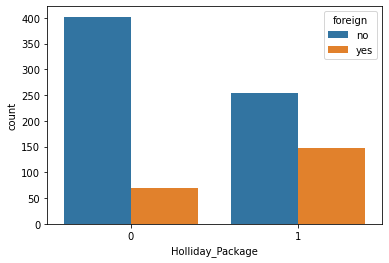

In [118]:
sns.countplot(x = 'Holliday_Package',data = holiday_package,hue='foreign')

In [115]:
holiday_package['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

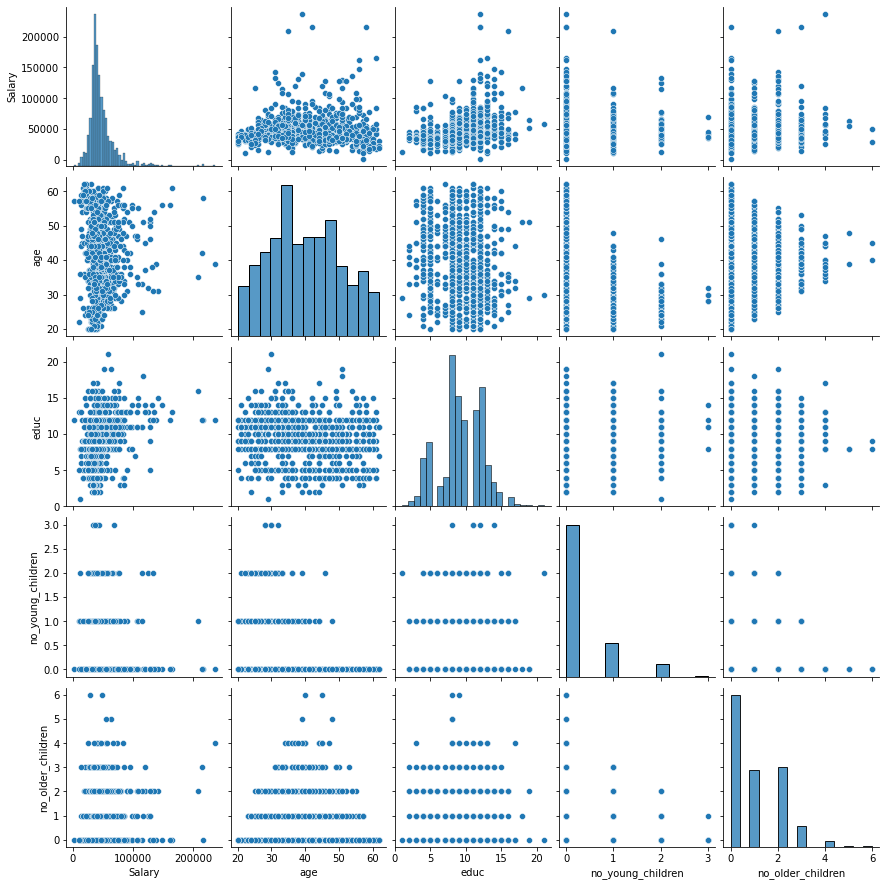

In [116]:
sns.pairplot(holiday_package)

<AxesSubplot:>

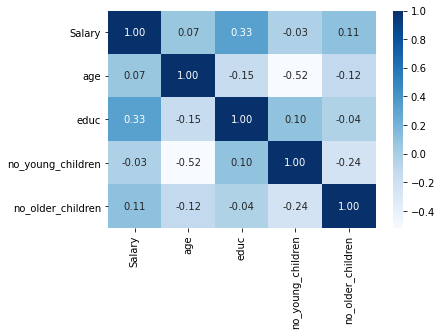

In [117]:
sns.heatmap(holiday_package.corr(),annot=True,cmap='Blues',fmt='0.2f')

In [14]:
q1 = holiday_package.quantile(0.25)
q3 = holiday_package.quantile(0.75)
iqr = q3 - q1
pd.DataFrame((((holiday_package < (q1 - 1.5*iqr)) | (holiday_package > (q3 + 1.5*iqr))).sum()/holiday_package.shape[0]*100),columns=['outliers%'],index = None).round(2)

,outliers%
Holliday_Package,0.00
Salary,6.54
age,0.00
educ,0.46
foreign,0.00
no_older_children,0.23
no_young_children,23.74


In [15]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    Upper_range = Q3 + (1.5*IQR)
    return lower_range,Upper_range

In [16]:
for column in holiday_package.columns:
    if holiday_package[column].dtype != 'object':
        lr,ur = remove_outliers(holiday_package[column])
        holiday_package[column] = np.where(holiday_package[column]<lr,lr,holiday_package[column])
        holiday_package[column] = np.where(holiday_package[column]> ur, ur,holiday_package[column])

<AxesSubplot:ylabel='no_older_children'>

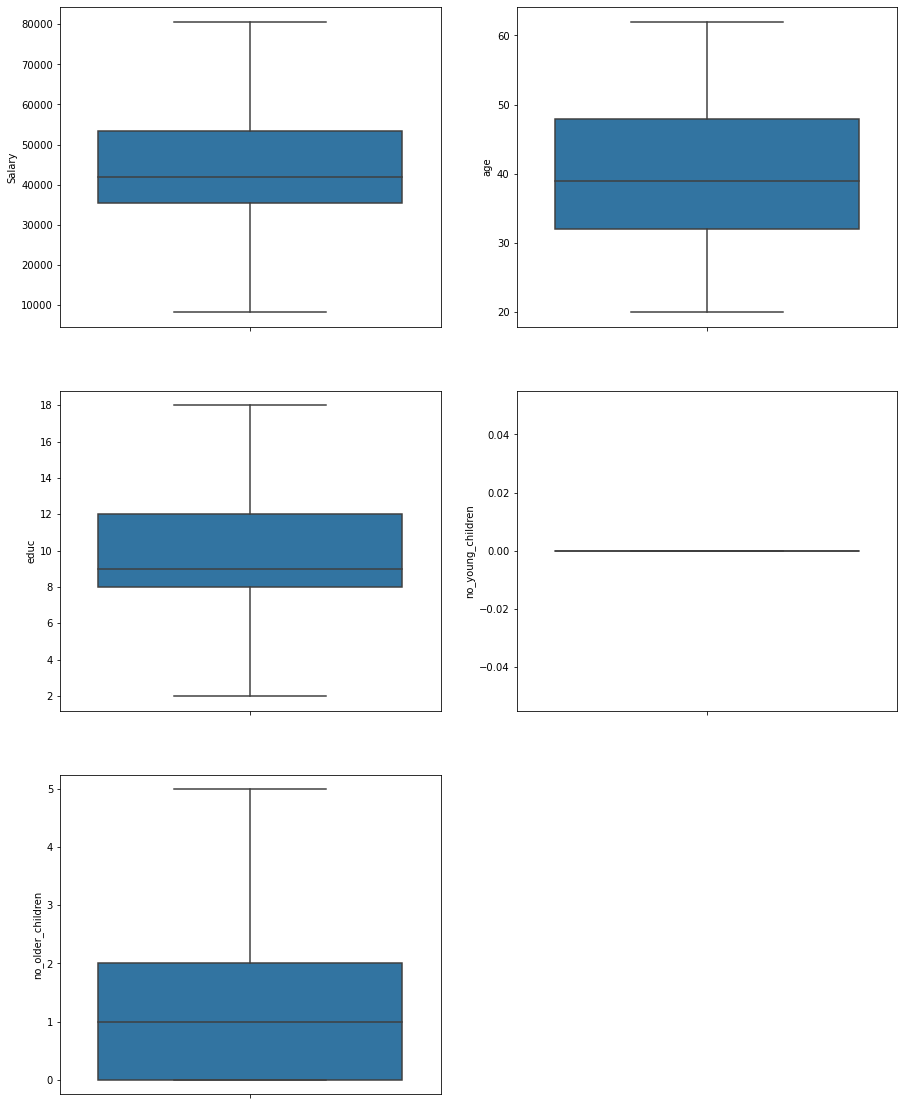

In [17]:
plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
sns.boxplot(y = 'Salary',data = holiday_package)
plt.subplot(3,2,2)
sns.boxplot(y = 'age',data = holiday_package)
plt.subplot(3,2,3)
sns.boxplot(y = 'educ',data = holiday_package)
plt.subplot(3,2,4)
sns.boxplot(y = 'no_young_children',data = holiday_package)
plt.subplot(3,2,5)
sns.boxplot(y = 'no_older_children',data = holiday_package)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
LE = LabelEncoder()

In [34]:
holiday_package['Holliday_Package'] = LE.fit_transform(holiday_package['Holliday_Package'])

In [35]:
holiday_package.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30.0,8.0,0.0,1.0,no
1,1,37207.0,45.0,8.0,0.0,1.0,no
2,0,58022.0,46.0,9.0,0.0,0.0,no
3,0,66503.0,31.0,11.0,0.0,0.0,no
4,0,66734.0,44.0,12.0,0.0,2.0,no


In [36]:
holiday_package_dummy = pd.get_dummies(holiday_package,drop_first=True)

In [37]:
holiday_package_dummy

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,0,48412.0,30.0,8.0,0.0,1.0,0
1,1,37207.0,45.0,8.0,0.0,1.0,0
2,0,58022.0,46.0,9.0,0.0,0.0,0
3,0,66503.0,31.0,11.0,0.0,0.0,0
4,0,66734.0,44.0,12.0,0.0,2.0,0
...,...,...,...,...,...,...,...
867,0,40030.0,24.0,4.0,0.0,1.0,1
868,1,32137.0,48.0,8.0,0.0,0.0,1
869,0,25178.0,24.0,6.0,0.0,0.0,1
870,1,55958.0,41.0,10.0,0.0,1.0,1


In [38]:
holiday_package_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int64  
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign_yes        872 non-null    uint8  
dtypes: float64(5), int64(1), uint8(1)
memory usage: 41.9 KB


In [39]:
X = holiday_package_dummy.drop('Holliday_Package',axis=1)
y = holiday_package_dummy[['Holliday_Package']]

In [40]:
X_train, X_test, train_labels,test_labels = train_test_split(X,y,test_size = 0.30, random_state = 1,stratify = y)

In [41]:
X_train.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
821,38974.0,47.0,12.0,0.0,2.0,1
805,40270.0,33.0,8.0,0.0,0.0,1
322,32573.0,30.0,11.0,0.0,0.0,0
701,43839.0,43.0,11.0,0.0,1.0,1
773,33060.0,40.0,5.0,0.0,1.0,1


In [42]:
X_train.shape

(610, 6)

In [43]:
train_labels.head()

,Holliday_Package
821,0
805,0
322,0
701,1
773,1


In [44]:
train_labels.shape

(610, 1)

In [45]:
X_test.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
264,25118.0,58.0,8.0,0.0,0.0,0
189,40913.0,20.0,9.0,0.0,0.0,0
643,28446.0,58.0,8.0,0.0,0.0,0
65,36072.0,35.0,4.0,0.0,2.0,0
241,52736.0,40.0,10.0,0.0,3.0,0


In [50]:
X_test.shape

(262, 6)

In [51]:
test_labels.head()

,Holliday_Package
264,1
189,0
643,0
65,1
241,0


In [52]:
test_labels.shape

(262, 1)

In [56]:
train_labels.value_counts()

Holliday_Package
0                   329
1                   281
dtype: int64

In [21]:
test_labels.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

In [77]:
model = LogisticRegression(solver='newton-cg',max_iter=1000,penalty = 'none', verbose=True, n_jobs=2)

In [78]:
model.fit(X_train,train_labels)

C:\Users\zaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.9s finished


LogisticRegression(max_iter=1000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [91]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [92]:
ytrain_predict

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [93]:
ytrain_predict_prob = model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head(10)

,0,1
0,0.267661,0.732339
1,0.356005,0.643995
2,0.541959,0.458041
3,0.326302,0.673698
4,0.336580,0.663420
5,0.619889,0.380111
6,0.675081,0.324919
7,0.558465,0.441535
8,0.636144,0.363856
9,0.380924,0.619076


In [94]:
model.score(X_train,train_labels)

0.6344262295081967

In [95]:
ytest_predict

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [96]:
ytest_predict_prob = model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head(10)

,0,1
0,0.640764,0.359236
1,0.569909,0.430091
2,0.655265,0.344735
3,0.564147,0.435853
4,0.538869,0.461131
5,0.485651,0.514349
6,0.672100,0.327900
7,0.281510,0.718490
8,0.401889,0.598111
9,0.615507,0.384493


In [97]:
model.score(X_test,test_labels)

0.6603053435114504

auc score is 0.661


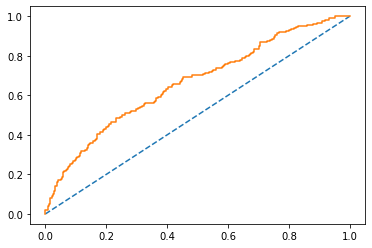

In [98]:
probs = model.predict_proba(X_train)
probs = probs[:,1]
from sklearn.metrics import roc_auc_score,roc_curve
auc = roc_auc_score(train_labels,probs)
print('auc score is %0.3f'%auc)
train_fpr, train_tpr, train_threshold = roc_curve(train_labels,probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(train_fpr,train_tpr)


auc score is 0.675


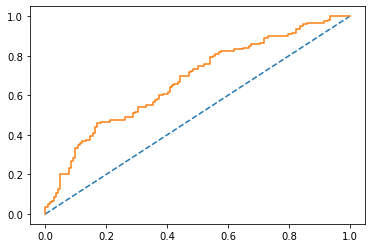

In [99]:
probs = model.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(test_labels,probs)
print('auc score is %0.3f'% auc)
test_fpr,test_tpr,test_threshold = roc_curve(test_labels,probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(test_fpr,test_tpr)

In [100]:
confusion_matrix(train_labels,ytrain_predict)

array([[260,  69],
       [154, 127]], dtype=int64)

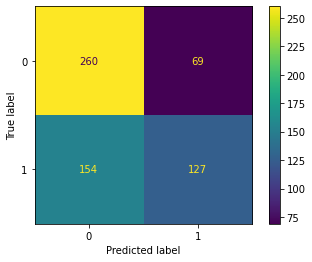

In [102]:
plot_confusion_matrix(model,X_train,train_labels)

In [34]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       329
           1       0.65      0.45      0.53       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.63      0.62       610



In [35]:
confusion_matrix(test_labels,ytest_predict)

array([[118,  24],
       [ 65,  55]], dtype=int64)

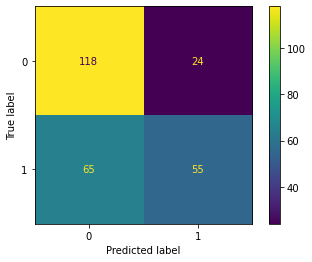

In [105]:
plot_confusion_matrix(model,X_test,test_labels)

In [36]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.83      0.73       142
           1       0.70      0.46      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.64       262
weighted avg       0.67      0.66      0.65       262



In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid = {'penalty': ['l2', 'none'],
             'solver': ['newton-cg','sag'],
             'max_iter':[1000,10000],
             'n_jobs':[2,3]}

In [62]:
grid_search = GridSearchCV(estimator= model, param_grid= param_grid)

In [64]:
grid_search.fit(X_train,train_labels)

C:\Users\zaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.1s finished
C:\Users\zaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.3s finished
C:\Users\zaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for e

[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    3.3s finished
C:\Users\zaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    2.1s finished
C:\Users\zaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    1.9s finished
C:\Users\zaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d ar

[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.1s finished
C:\Users\zaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.3s finished
C:\Users\zaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.3s finished
C:\Users\zaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d ar

[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    1.8s finished
C:\Users\zaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    0.1s finished
C:\Users\zaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    0.2s finished
C:\Users\zaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d ar

GridSearchCV(estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          penalty='none', solver='newton-cg',
                                          verbose=True),
             param_grid={'max_iter': [1000, 10000], 'n_jobs': [2, 3],
                         'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'sag']})

In [65]:
grid_search.best_params_

{'max_iter': 1000, 'n_jobs': 2, 'penalty': 'l2', 'solver': 'newton-cg'}

In [103]:
grid_search.score(X_train,train_labels)

0.6344262295081967

In [104]:
grid_search.score(X_test,test_labels)

0.6564885496183206

In [106]:
clf = LinearDiscriminantAnalysis()
model = clf.fit(X_train,train_labels)

C:\Users\zaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [107]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [108]:
ytrain_predict

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [109]:
ytrain_predict_prob = model.predict_proba(X_train)
ytest_predict_prob = model.predict_proba(X_test)

In [110]:
print(pd.DataFrame(ytrain_predict_prob))

            0         1
0    0.263852  0.736148
1    0.350635  0.649365
2    0.547033  0.452967
3    0.321572  0.678428
4    0.330963  0.669037
..        ...       ...
605  0.626716  0.373284
606  0.545528  0.454472
607  0.558755  0.441245
608  0.323918  0.676082
609  0.541009  0.458991

[610 rows x 2 columns]


In [111]:
ytest_predict

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [112]:
print(pd.DataFrame(ytest_predict_prob))

            0         1
0    0.644519  0.355481
1    0.574252  0.425748
2    0.658803  0.341197
3    0.567407  0.432593
4    0.542866  0.457134
..        ...       ...
257  0.469129  0.530871
258  0.575034  0.424966
259  0.563553  0.436447
260  0.656112  0.343888
261  0.541522  0.458478

[262 rows x 2 columns]


In [113]:
confusion_matrix(train_labels,ytrain_predict)

array([[263,  66],
       [158, 123]], dtype=int64)

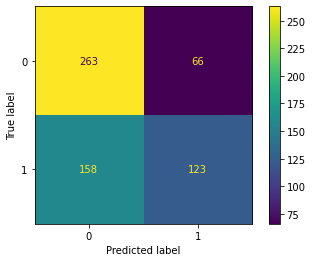

In [116]:
plot_confusion_matrix(model,X_train,train_labels)

In [114]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610



In [115]:
confusion_matrix(test_labels,ytest_predict)

array([[118,  24],
       [ 66,  54]], dtype=int64)

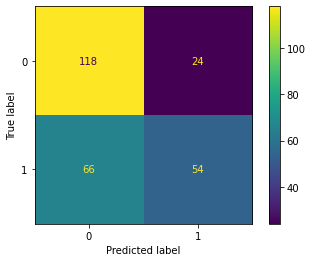

In [117]:
plot_confusion_matrix(model,X_test,test_labels)

In [ ]:
plot_confusion_matrix()

In [56]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262



auc score is 0.661


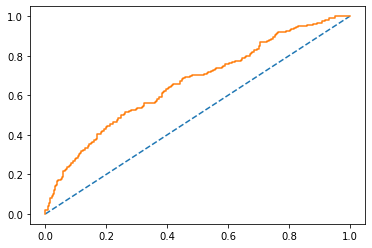

In [57]:
probs = model.predict_proba(X_train)
probs = probs[:,1]
auc = roc_auc_score(train_labels,probs)
print('auc score is %0.3f'%auc)
train_fpr,train_tpr,train_threshold = roc_curve(train_labels,probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(train_fpr,train_tpr)

auc score is 0.675


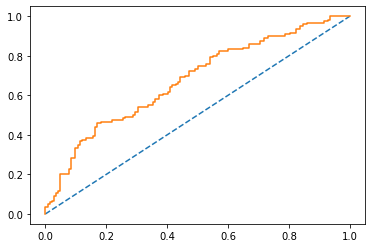

In [58]:
probs = model.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(test_labels,probs)
print('auc score is %0.3f'%auc)
test_fpr,test_tpr,test_threshold = roc_curve(test_labels,probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(test_fpr,test_tpr)